In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import data_fcts as df

In [4]:
exp_folder = "/home/leni/remote-folder/meim/"


In [6]:
parent_fits = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, evals, deltas = df.load_fitness(exp_folder + "/" + folder + "/fitness.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","number new inds","parent 1","parent 2","fitness","replicate"])



meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


/tmp/ipykernel_90656/1323565887.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
/tmp/ipykernel_90656/1323565887.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')


<Axes: xlabel='iteration', ylabel='fitness'>

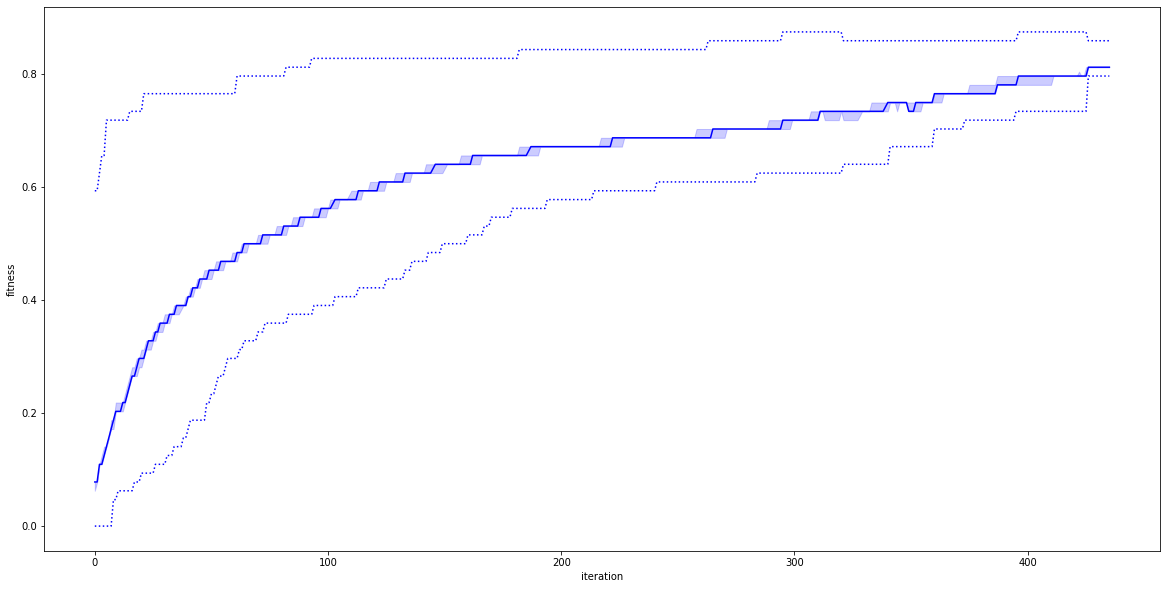

In [7]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=par_fit_data,x="iteration",y="fitness",estimator=np.median,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')



In [9]:
parent_descs = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_descriptor(exp_folder + "/" + folder + "/morph_features.csv")
    descs = [d +[folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","replicate"])


meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x1440 with 0 Axes>

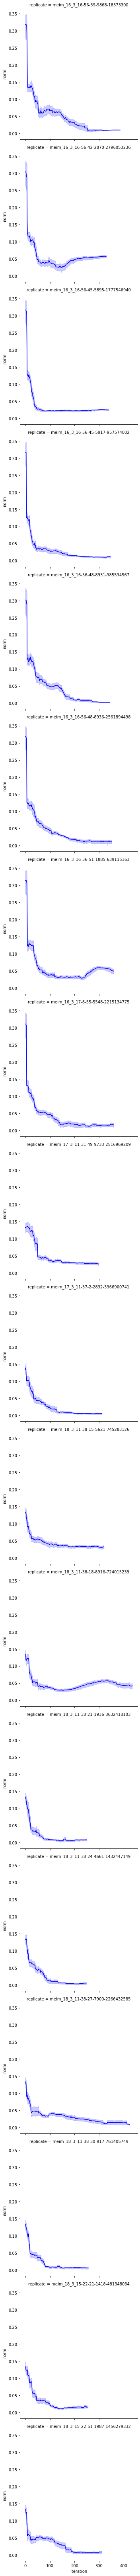

In [10]:
fig = plt.gcf()
fig.set_size_inches(40,20)
ax = sns.relplot(data=par_desc_data,kind="line",x="iteration",y="norm",estimator=np.std,color='b',row="replicate")

In [11]:
new_data_list = []
for rep in par_desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = par_desc_data.loc[par_desc_data["replicate"]==rep]
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)


meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


In [12]:
#std_data.reset_index()
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

      iteration  robot index  number new inds     width     depth  \
0             0    66.250558              0.0  0.126623  0.122700   
1             1    72.039054              0.0  0.126623  0.122700   
2             2    75.375967              0.0  0.126623  0.122700   
3             3    77.263746              0.0  0.126623  0.122700   
4             4    78.657197              0.0  0.125617  0.121392   
...         ...          ...              ...       ...       ...   
5936        306  2628.238179              0.0  0.001580  0.002331   
5937        307  2693.153631              0.0  0.001580  0.002331   
5938        308  2736.994361              0.0  0.001580  0.002331   
5939        309  2759.187247              0.0  0.001580  0.002331   
5940        310  2780.898805              0.0  0.001580  0.002331   

            height        voxels    wheels  sensors    joints   casters  \
0     1.544837e-01  2.335010e-01  0.120137      0.0  0.195317  0.124119   
1     1.544837e-01  2

/tmp/ipykernel_90656/3509515378.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.max,ci=None,color='g')
/tmp/ipykernel_90656/3509515378.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.min,ci=None,color='g')


Text(0, 0.5, 'Morphological diversity')

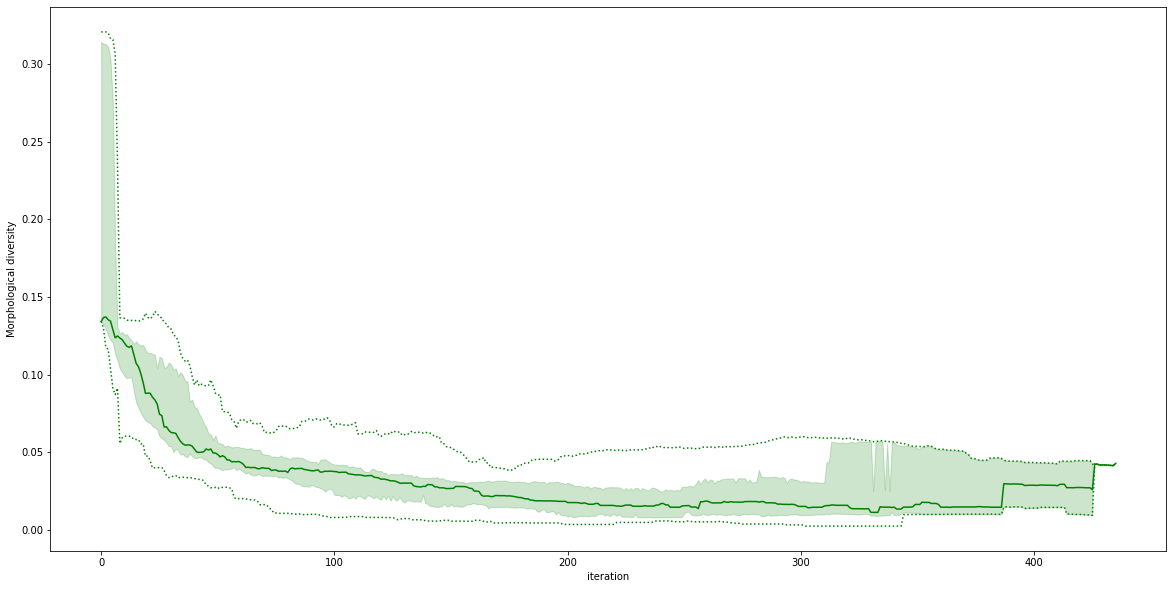

In [13]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="norm",estimator=np.median,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological diversity")